In [1]:
import requests
import datetime as dt
import pandas
import warnings
import japanize_matplotlib
warnings.simplefilter('ignore')

In [15]:
dt_now=dt.datetime.now()
file_day=dt_now - dt.timedelta(days=1)
file_day=file_day.strftime("%Y%m%d")
#ファイルのダウンロード
try:
  url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
  urlData = requests.get(url).content
  filename=str(file_day)+'hasseijoukyou.xlsx'
  print(url)
  if urlData.decode().startswith('<?xml'):
    print('1')
    file_day=dt_now - dt.timedelta(days=2)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
    urlData = requests.get(url).content
    filename=str(file_day)+'hasseijoukyou.xlsx'
    if urlData.decode().startswith('<?xml'):
      print('2')
      file_day=dt_now - dt.timedelta(days=1)
      file_day=file_day.strftime("%Y%m%d")
      url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
      urlData = requests.get(url).content
      filename=str(file_day)+'hasseijkyou_1.xlsx'
    else:
      file_day=dt_now - dt.timedelta(days=2)
      file_day=file_day.strftime("%Y%m%d")
      url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
      urlData = requests.get(url).content
      filename=str(file_day)+'hasseijkyou_1.xlsx'
  else:
    print('終了')
except:
  file_day=dt_now - dt.timedelta(days=2)
  file_day=file_day.strftime("%Y%m%d")
  try:
    urlData = requests.get(url).content
  except:
    print('ファイルが存在しません')
  url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou.xlsx'
  filename=str(file_day)+'hasseijkyou.xlsx'
with open('data/'+str(filename) ,mode='wb') as f: # wb でバイト型を書き込める
  f.write(urlData)

https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/20210822hasseijoukyou.xlsx


In [3]:
#本来はExcelデータを入力するようにする.
print(str(filename))
corona=pandas.read_excel('data/'+str(filename), header=1)
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corona=corona.reset_index()
for i in range(len(corona)):
    if type(corona['判明日'][i]) is int:
        corona['判明日'][i]=pandas.to_datetime('1900/1/1') + pandas.to_timedelta(corona['判明日'][i] - 1, unit='days')
#データの整形
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
#当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにする.(暫定方法)
corona['Year']=0
corona['Month']=0
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%Y-%m-%d %H:%M:%S')
corona['Year']=corona['判明日'].dt.year
corona['Month']=corona['判明日'].dt.month

20210822hasseijkyou_1.xlsx


ValueError: Excel file format cannot be determined, you must specify an engine manually.

<h1>全体データ</h1>

In [ ]:
corona

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11316,30代,女性,宇都宮市,調査中,2021-08-20,※宇都宮市4140例目,2021.0,8.0
1,1,1,11315,10歳未満,女性,宇都宮市,調査中,2021-08-20,※宇都宮市4139例目,2021.0,8.0
2,2,2,11314,80代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4138例目,2021.0,8.0
3,3,3,11313,10代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4137例目,2021.0,8.0
4,4,4,11312,40代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4136例目,2021.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
11304,11311,11320,4,50代,男性,県南,NaN,2020-03-21,ポルトガル旅行,2020.0,3.0
11305,11312,11321,3,40代,女性,宇都宮,NaN,2020-03-19,タイ旅行 \n※宇都宮市1例目,2020.0,3.0
11306,11313,11322,2,30代,女性,県南,NaN,2020-03-06,大阪ライブハウス、ショッピングセンター勤務,2020.0,3.0
11307,11314,11323,1,60代,女性,県南,NaN,2020-02-23,クルーズ船下船,2020.0,2.0


<h2>最新データ</h2>

In [ ]:
corona_s=corona[corona['判明日']==corona['判明日'][0]]
print(str(corona['判明日'][0])+'のデータの件数')
print(str(len(corona_s))+'件')

2021-08-20 00:00:00のデータの件数
79件


In [ ]:
corona_s

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11316,30代,女性,宇都宮市,調査中,2021-08-20,※宇都宮市4140例目,2021.0,8.0
1,1,1,11315,10歳未満,女性,宇都宮市,調査中,2021-08-20,※宇都宮市4139例目,2021.0,8.0
2,2,2,11314,80代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4138例目,2021.0,8.0
3,3,3,11313,10代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4137例目,2021.0,8.0
4,4,4,11312,40代,男性,宇都宮市,調査中,2021-08-20,※宇都宮市4136例目,2021.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
105,105,105,11211,30代,女性,真岡市,2021-08-16 00:00:00,2021-08-20,NaN,2021.0,8.0
106,106,106,11210,30代,男性,真岡市,2021-08-16 00:00:00,2021-08-20,11215例目の同居家族,2021.0,8.0
107,107,107,11209,20代,女性,真岡市,2021-08-16 00:00:00,2021-08-20,11216例目の同居家族,2021.0,8.0
108,108,108,11208,40代,男性,真岡市,2021-08-16 00:00:00,2021-08-20,,2021.0,8.0


<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

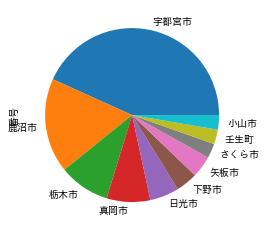

In [ ]:
corona_place=corona_s.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市    32
鹿沼市     13
栃木市      7
真岡市      6
日光市      4
下野市      3
矢板市      3
さくら市     2
壬生町      2
小山市      2
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

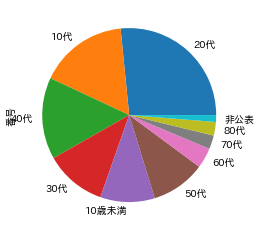

In [ ]:
corona_nen=corona_s.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      21
10代      13
40代      12
30代       9
10歳未満     8
50代       8
60代       3
70代       2
80代       2
非公表       1
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

In [ ]:
corona_sei=corona_s.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

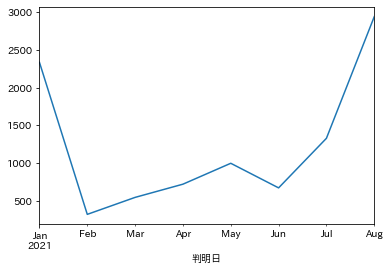

In [ ]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['Year'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['番号']

判明日
2021-01-31    2337
2021-02-28     322
2021-03-31     547
2021-04-30     722
2021-05-31     999
2021-06-30     673
2021-07-31    1330
2021-08-31    2942
Freq: M, Name: 番号, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

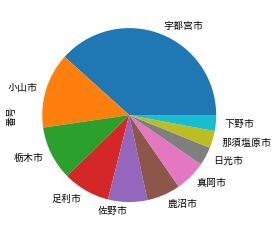

In [ ]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     3176
小山市      1159
栃木市       832
足利市       722
佐野市       606
鹿沼市       518
真岡市       481
日光市       284
那須塩原市     265
下野市       244
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

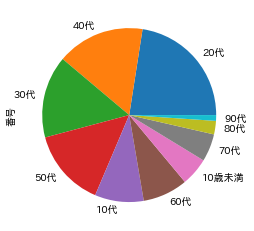

In [ ]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      2221
40代      1608
30代      1506
50代      1425
10代       894
60代       825
10歳未満     515
70代       507
80代       247
90代       105
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

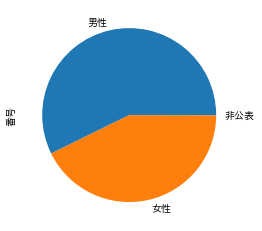

In [ ]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [ ]:
corona_sei

性別
男性     5655
女性     4213
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

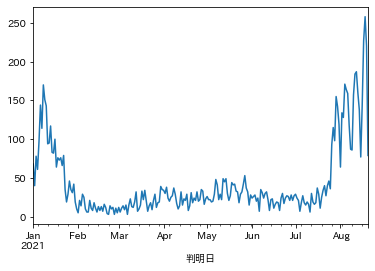

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号']

判明日
2021-01-01     68
2021-01-02     40
2021-01-03     78
2021-01-04     61
2021-01-05     97
             ... 
2021-08-16    144
2021-08-17    227
2021-08-18    258
2021-08-19    220
2021-08-20     79
Freq: D, Name: 番号, Length: 232, dtype: int64

<h1>今月のデータ</h1>

In [ ]:
dt_now = dt.datetime.now()
dt_now.month
corona_toYear=corona[corona['Year']==2021]
corona_toYear=corona_toYear[corona_toYear['Month']==8]

<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

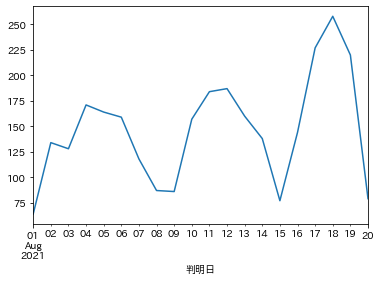

In [ ]:
corona_toYear.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

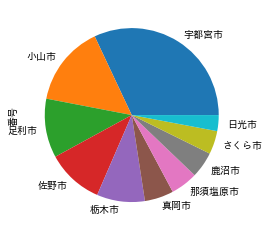

In [ ]:
corona_place=corona_toYear.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     767
小山市      359
足利市      263
佐野市      253
栃木市      214
真岡市      129
那須塩原市    121
鹿沼市      116
さくら市     104
日光市       71
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

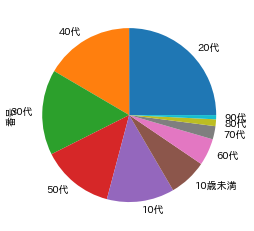

In [ ]:
corona_nen=corona_toYear.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      735
40代      486
30代      466
50代      395
10代      369
10歳未満    208
60代      147
70代       72
80代       37
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

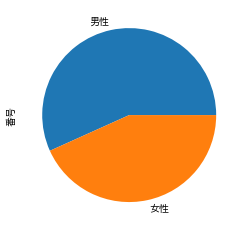

In [ ]:
corona_sei=corona_toYear.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)